# Methylglyoxal affects translation fidelity: data analysis file

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

## Data input and normalization

|||
|---|---|
|**Rluc**|Renilla luciferase|
|**Fluc**|firefly luciferase|
|**280**|WT Fluc|
|**321**|H245R (CGC) Fluc|
|**331**|H245R (AGA) Fluc|
|**414**|D357X Fluc|
|**+/-**|inhibitor treatment|

In [2]:
# Luminescence output for Rluc

ren = pd.DataFrame({
                    "280 -" : [845015, 903119, 866761, 845775],
                    "280 +" : [932877, 964491, 978918, 866026],
                    "321 -" : [752156, 790781, 777343, 783680],
                    "321 +" : [817547, 782224, 842710, 782677],
                    "331 -" : [871138, 839190, 893205, 826392],
                    "331 +" : [791577, 866357, 861853, 837656],
                    "414 -" : [38416, 47832, 51462, 46579],
                    "414 +" : [40582, 47008, 47994, 47246]
                    })

In [3]:
# Luminescence output for Fluc

luc = pd.DataFrame({
                    "280 -" : [955753, 890900, 863502, 849463],
                    "280 +" : [910469, 871900, 888673, 812031],
                    "321 -" : [14568, 20458, 20577, 17842],
                    "321 +" : [5368, 5943, 5748, 5153],
                    "331 -" : [3731, 3599, 3258, 3537],
                    "331 +" : [2825, 3035, 2999, 2701],
                    "414 -" : [919, 1072, 910, 973],
                    "414 +" : [717, 966, 849, 882]
                    })

In [4]:
# Luminescence normalization

norm = luc/ren
norm

,280 -,280 +,321 -,321 +,331 -,331 +,414 -,414 +
0,1.131049,0.975980,0.019368,0.006566,0.004283,0.003569,0.023922,0.017668
1,0.986470,0.904000,0.025871,0.007598,0.004289,0.003503,0.022412,0.020550
2,0.996240,0.907811,0.026471,0.006821,0.003648,0.003480,0.017683,0.017690
3,1.004360,0.937652,0.022767,0.006584,0.004280,0.003224,0.020889,0.018668


## Normalized signal data plots and Student's t-tests

### Near-cognate misreading

<Axes: >

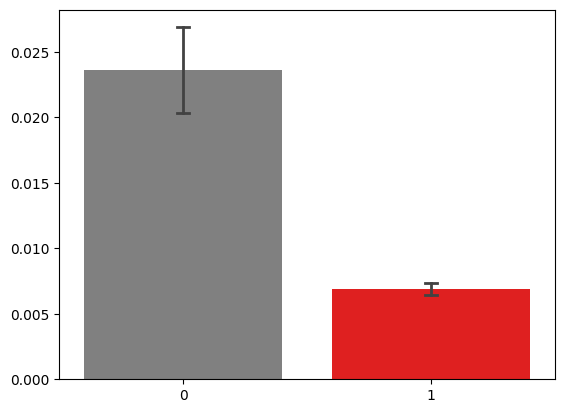

In [5]:
colors = ["grey", "red"]
sns.barplot(data = [norm["321 -"], norm["321 +"]], errorbar = "sd", errwidth = 2, capsize = 0.05, palette = colors)

In [6]:
# Student's t-test for non-treated vs. treated

stats.ttest_ind(norm["321 -"], norm["321 +"])

TtestResult(statistic=10.132740051167092, pvalue=5.372162514379259e-05, df=6.0)

### Non-cognate misreading

<Axes: >

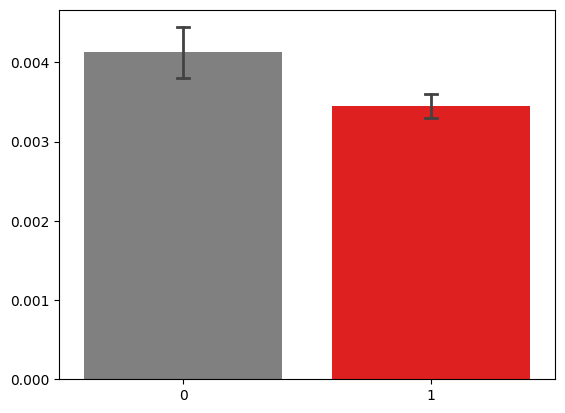

In [7]:
sns.barplot(data = [norm["331 -"], norm["331 +"]], errorbar = "sd", errwidth = 2, capsize = 0.05, palette = colors)

In [8]:
# Student's t-test for non-treated vs. treated

stats.ttest_ind(norm["331 -"], norm["331 +"])

TtestResult(statistic=3.864911473772767, pvalue=0.008314787354030519, df=6.0)

### Read-through misreading

<Axes: >

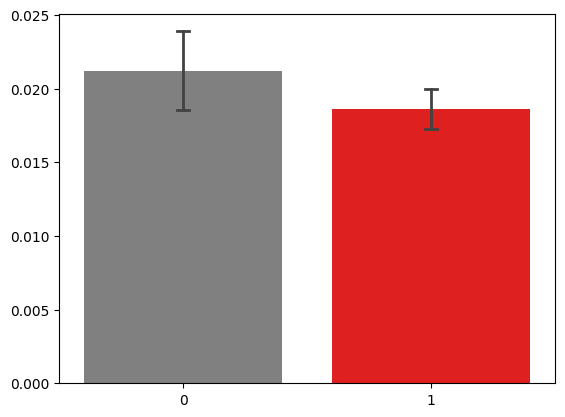

In [9]:
sns.barplot(data = [norm["414 -"], norm["414 +"]], errorbar = "sd", errwidth = 2, capsize = 0.05, palette = colors)

In [10]:
# Student's t-test for non-treated vs. treated

stats.ttest_ind(norm["414 -"], norm["414 +"])

TtestResult(statistic=1.726958446303936, pvalue=0.13492086710042633, df=6.0)

## Renilla readout as global translation output and Student's t-tests

### Near-cognate misreading

<Axes: >

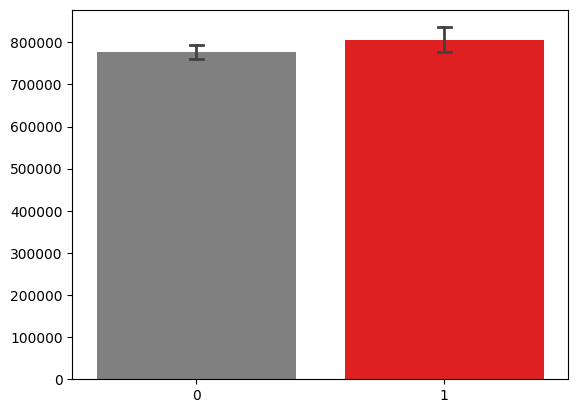

In [11]:
colors = ["grey", "red"]
sns.barplot(data = [ren["321 -"], ren["321 +"]], errorbar = "sd", errwidth = 2, capsize = 0.05, palette = colors)

In [12]:
# Student's t-test for non-treated vs. treated

stats.ttest_ind(ren["321 -"], ren["321 +"])

TtestResult(statistic=-1.7901655777700847, pvalue=0.12362453468104315, df=6.0)

### Non-cognate misreading

<Axes: >

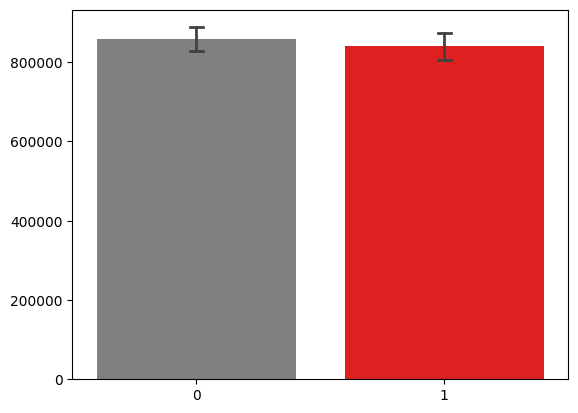

In [13]:
sns.barplot(data = [ren["331 -"], ren["331 +"]], errorbar = "sd", errwidth = 2, capsize = 0.05, palette = colors)

In [14]:
# Student's t-test for non-treated vs. treated

stats.ttest_ind(ren["331 -"], ren["331 +"])

TtestResult(statistic=0.7918057587658719, pvalue=0.45862477650351174, df=6.0)

### Read-through misreading

<Axes: >

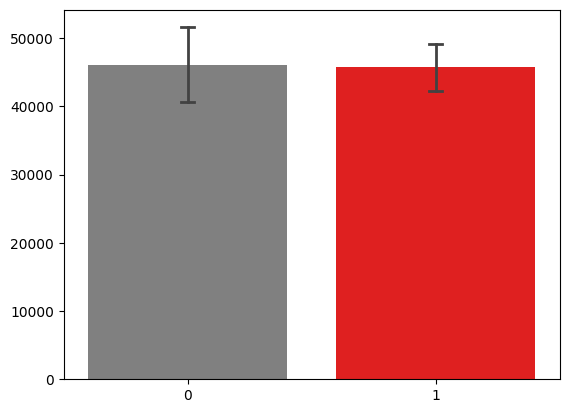

In [15]:
sns.barplot(data = [ren["414 -"], ren["414 +"]], errorbar = "sd", errwidth = 2, capsize = 0.05, palette = colors)

In [16]:
# Student's t-test for non-treated vs. treated

stats.ttest_ind(ren["414 -"], ren["414 +"])

TtestResult(statistic=0.11230690689204381, pvalue=0.9142431696397373, df=6.0)

## Effect size calculation

In [17]:
# Define function for Cohen's d

def cohens_d(sample1, sample2):
    """
    Calculate Cohen's d for two samples.
    
    Parameters:
    - sample1, sample2: Lists or arrays of sample data.
    
    Returns:
    - Cohen's d value.
    """
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    n1, n2 = len(sample1), len(sample2)
    std1, std2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)  # ddof=1 for sample standard deviation
    
    # Calculate the pooled standard deviation
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    
    # Calculate Cohen's d
    d = (mean1 - mean2) / pooled_std
    
    return d

In [18]:
# Near-cognate misreading

cohens_d(norm["321 -"], norm["321 +"])

7.164929202180776

In [19]:
# Non-cognate misreading

cohens_d(norm["331 -"], norm["331 +"])

2.732905111790416

In [20]:
# Read-through misreading

cohens_d(norm["414 -"], norm["414 +"])

1.2211440282088972